In [1]:
import pandas as pd
import numpy as np

In [224]:
df = pd.read_csv(r'D:\MLOPSS\Project 1\ev_battery_synth.csv')

In [225]:
df.head()

battery_id manufacturer chemistry  capacity_kWh  charge_cycles  \
0  BAT000001    Panasonic       NMC         65.54         1524.0   
1  BAT000002  Samsung SDI       LFP           NaN         1072.0   
2  BAT000003          BYD       LFP         99.99          807.0   
3  BAT000004         CATL       NMC         85.96          681.0   
4  BAT000005        Tesla       NMC         69.85          476.0   

   avg_temp_celsius  discharge_rate_c  charge_rate_c  avg_soc_percent  \
0             26.61             1.507          0.500            51.96   
1             16.82             0.850          0.927            80.76   
2              6.27             0.751          1.232            74.73   
3             28.65             0.788          1.070            30.95   
4             41.57             0.683          0.607            59.67   

   storage_time_months  fast_charge_ratio  calendar_age_years  \
0                  0.1              0.155                1.58   
1                 11.0              0.466                3.44   
2                  3.5              0.058                0.23   
3                  0.2              0.332                3.43   
4                  3.6              0.307                0.34   

   capacity_retained_percent  
0                      81.75  
1                      81.93  
2                      89.75  
3                      84.41  
4                      87.04

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   battery_id                 15000 non-null  object 
 1   manufacturer               14315 non-null  object 
 2   chemistry                  14256 non-null  object 
 3   capacity_kWh               14268 non-null  float64
 4   charge_cycles              14311 non-null  float64
 5   avg_temp_celsius           14282 non-null  float64
 6   discharge_rate_c           14280 non-null  float64
 7   charge_rate_c              14289 non-null  float64
 8   avg_soc_percent            14241 non-null  float64
 9   storage_time_months        14259 non-null  float64
 10  fast_charge_ratio          14254 non-null  float64
 11  calendar_age_years         14203 non-null  float64
 12  capacity_retained_percent  14249 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.5+ M

In [227]:
df.describe()

capacity_kWh  charge_cycles  avg_temp_celsius  discharge_rate_c  \
count  14268.000000   14311.000000      14282.000000      14280.000000   
mean      74.831688     724.540354         24.836594          1.060485   
std       14.809087     398.426835          8.644186          0.498338   
min       40.000000      50.000000         -9.940000          0.500000   
25%       64.507500     467.500000         19.940000          0.584000   
50%       74.900000     655.000000         25.030000          0.989000   
75%       85.030000     880.000000         30.070000          1.393000   
max      120.000000    2898.000000         50.000000          3.303000   

       charge_rate_c  avg_soc_percent  storage_time_months  fast_charge_ratio  \
count   14289.000000     14241.000000         14259.000000       14254.000000   
mean        1.017919        55.178979             3.962192           0.273791   
std         0.360305        14.923134             3.957581           0.175465   
min         0.500000        10.000000             0.000000           0.000000   
25%         0.731000        45.040000             1.100000           0.132000   
50%         0.997000        55.410000             2.700000           0.245000   
75%         1.267000        65.430000             5.500000           0.390000   
max         2.534000        90.000000            24.000000           0.938000   

       calendar_age_years  capacity_retained_percent  
count        14203.000000               14249.000000  
mean             1.997541                  87.059668  
std              1.977227                   6.587419  
min              0.100000                  25.010000  
25%              0.570000                  84.000000  
50%              1.380000                  87.840000  
75%              2.770000                  91.050000  
max             12.000000                 124.990000

In [228]:
len(df)

15000

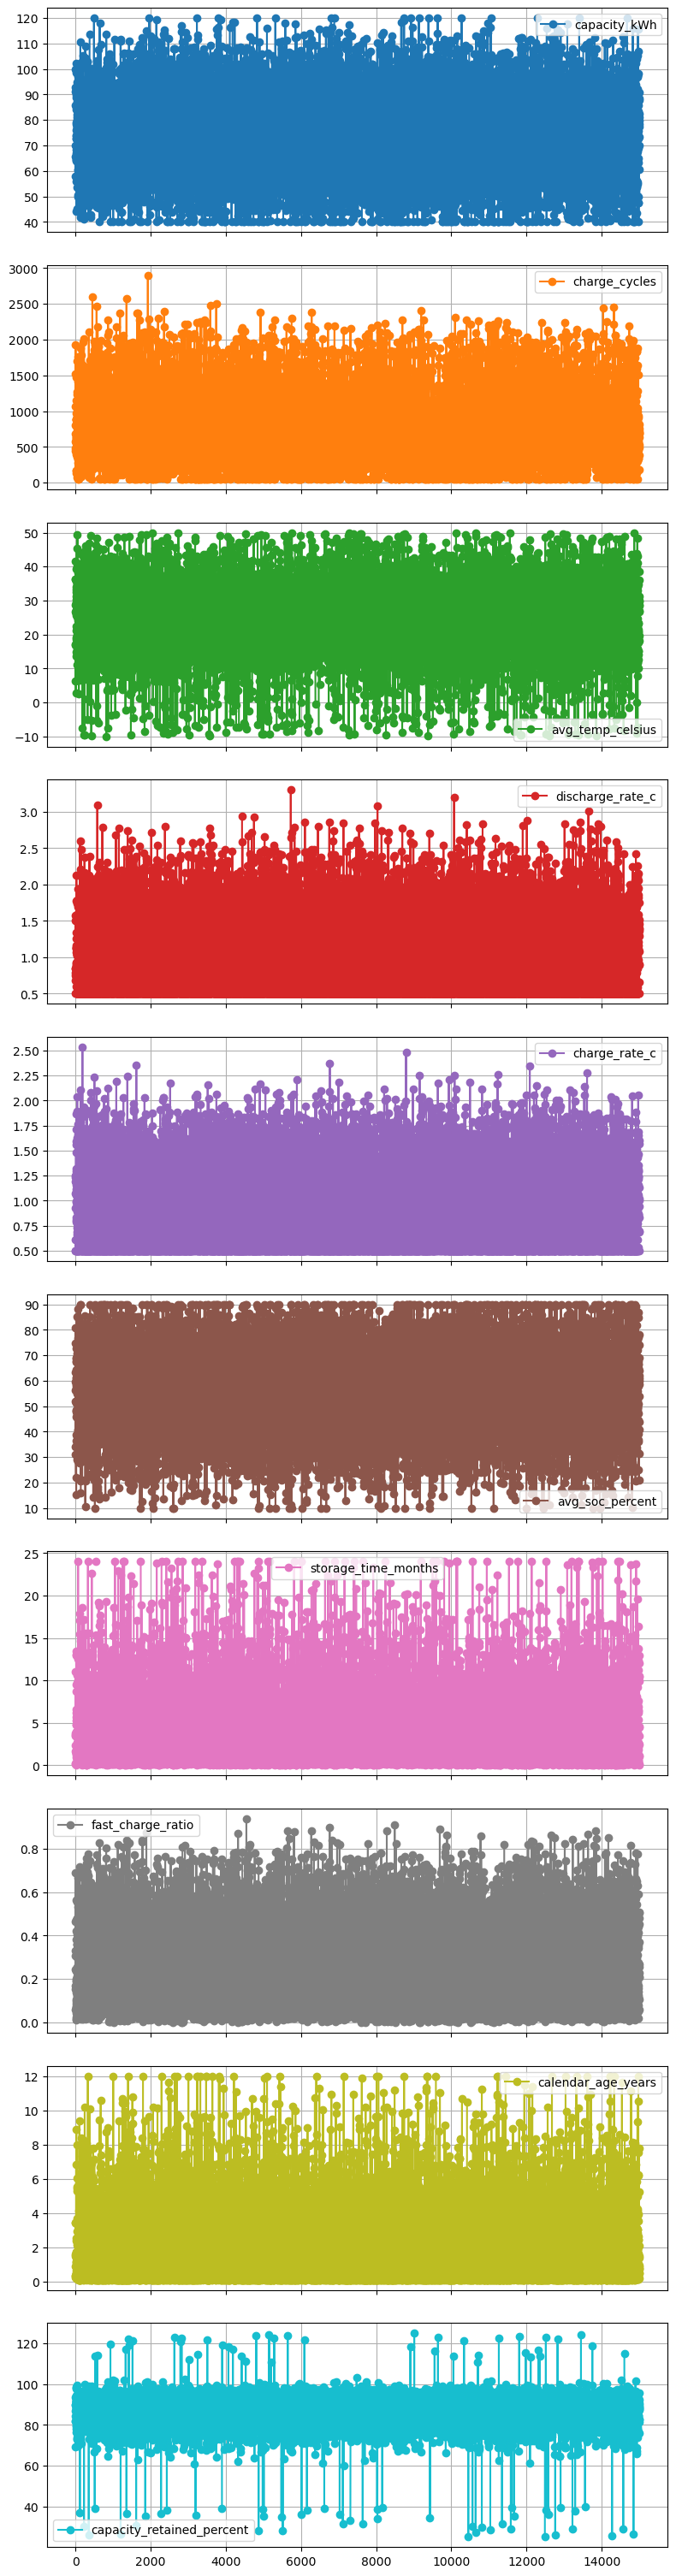

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Create subplots for each column
num_cols = len(df.columns)
df.plot(subplots=True, layout=(num_cols, 1), figsize=(8, num_cols*3), marker='o', grid=True)

plt.tight_layout()
plt.show()

In [230]:
df.isnull().mean()*100

battery_id                   0.000000
manufacturer                 4.566667
chemistry                    4.960000
capacity_kWh                 4.880000
charge_cycles                4.593333
avg_temp_celsius             4.786667
discharge_rate_c             4.800000
charge_rate_c                4.740000
avg_soc_percent              5.060000
storage_time_months          4.940000
fast_charge_ratio            4.973333
calendar_age_years           5.313333
capacity_retained_percent    5.006667
dtype: float64

In [231]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

KeyboardInterrupt: 

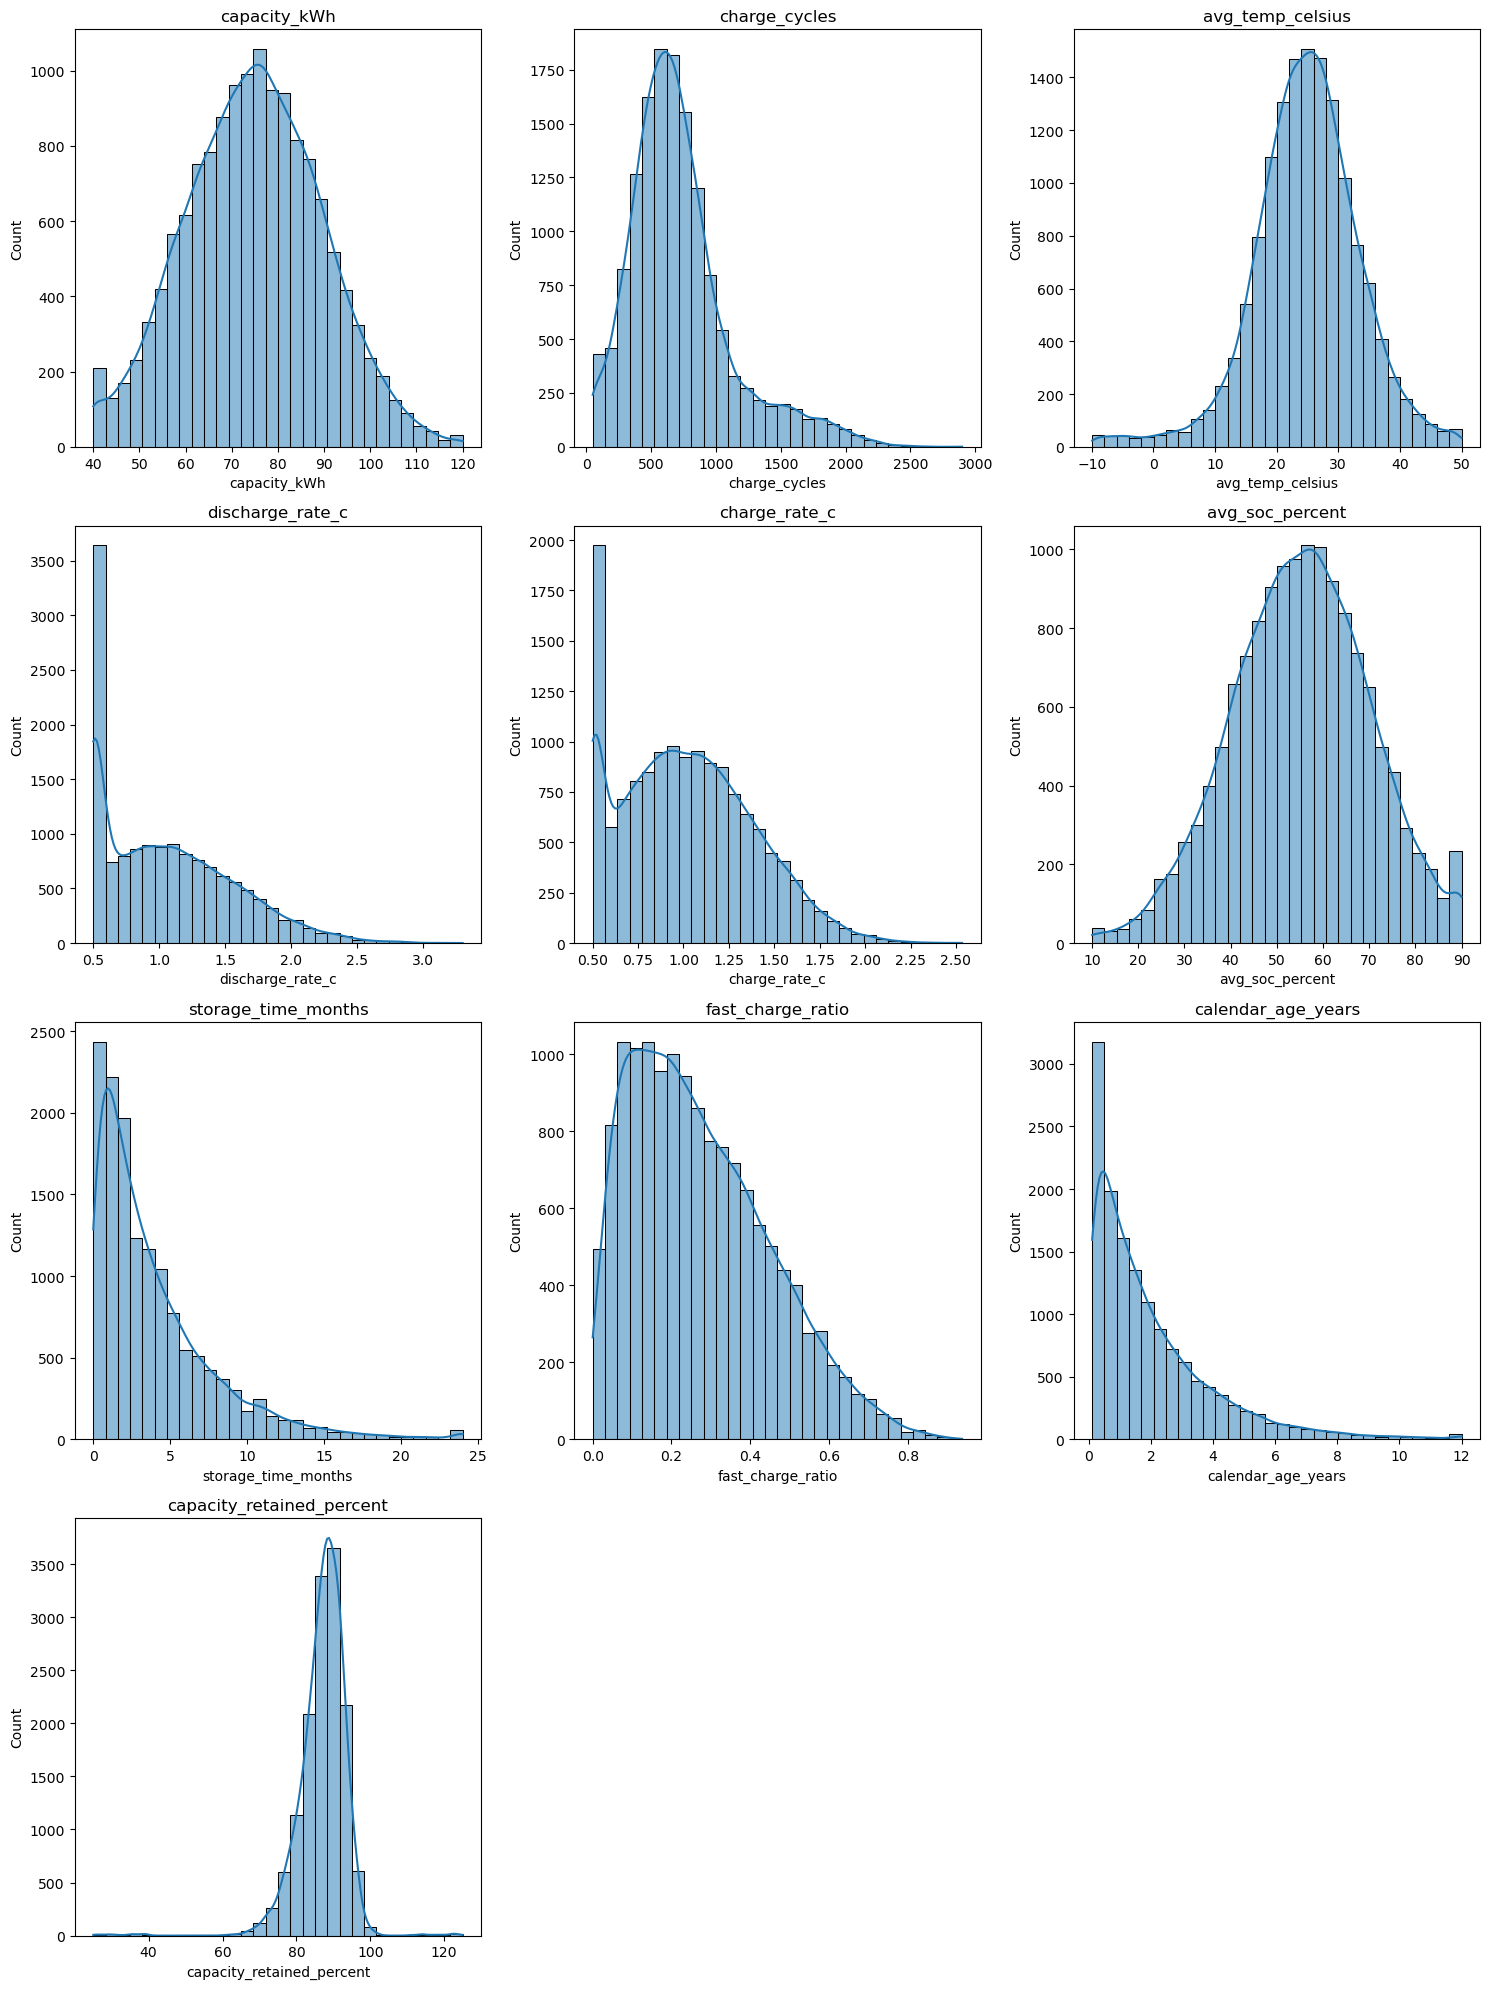

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)
fig, axes = plt.subplots(int(np.ceil(n_cols/3)), 3, figsize=(15, 5*int(np.ceil(n_cols/3))))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f"{col}")

for idx in range(n_cols, len(axes)):
    fig.delaxes(axes[idx])
    
plt.tight_layout()
plt.show()

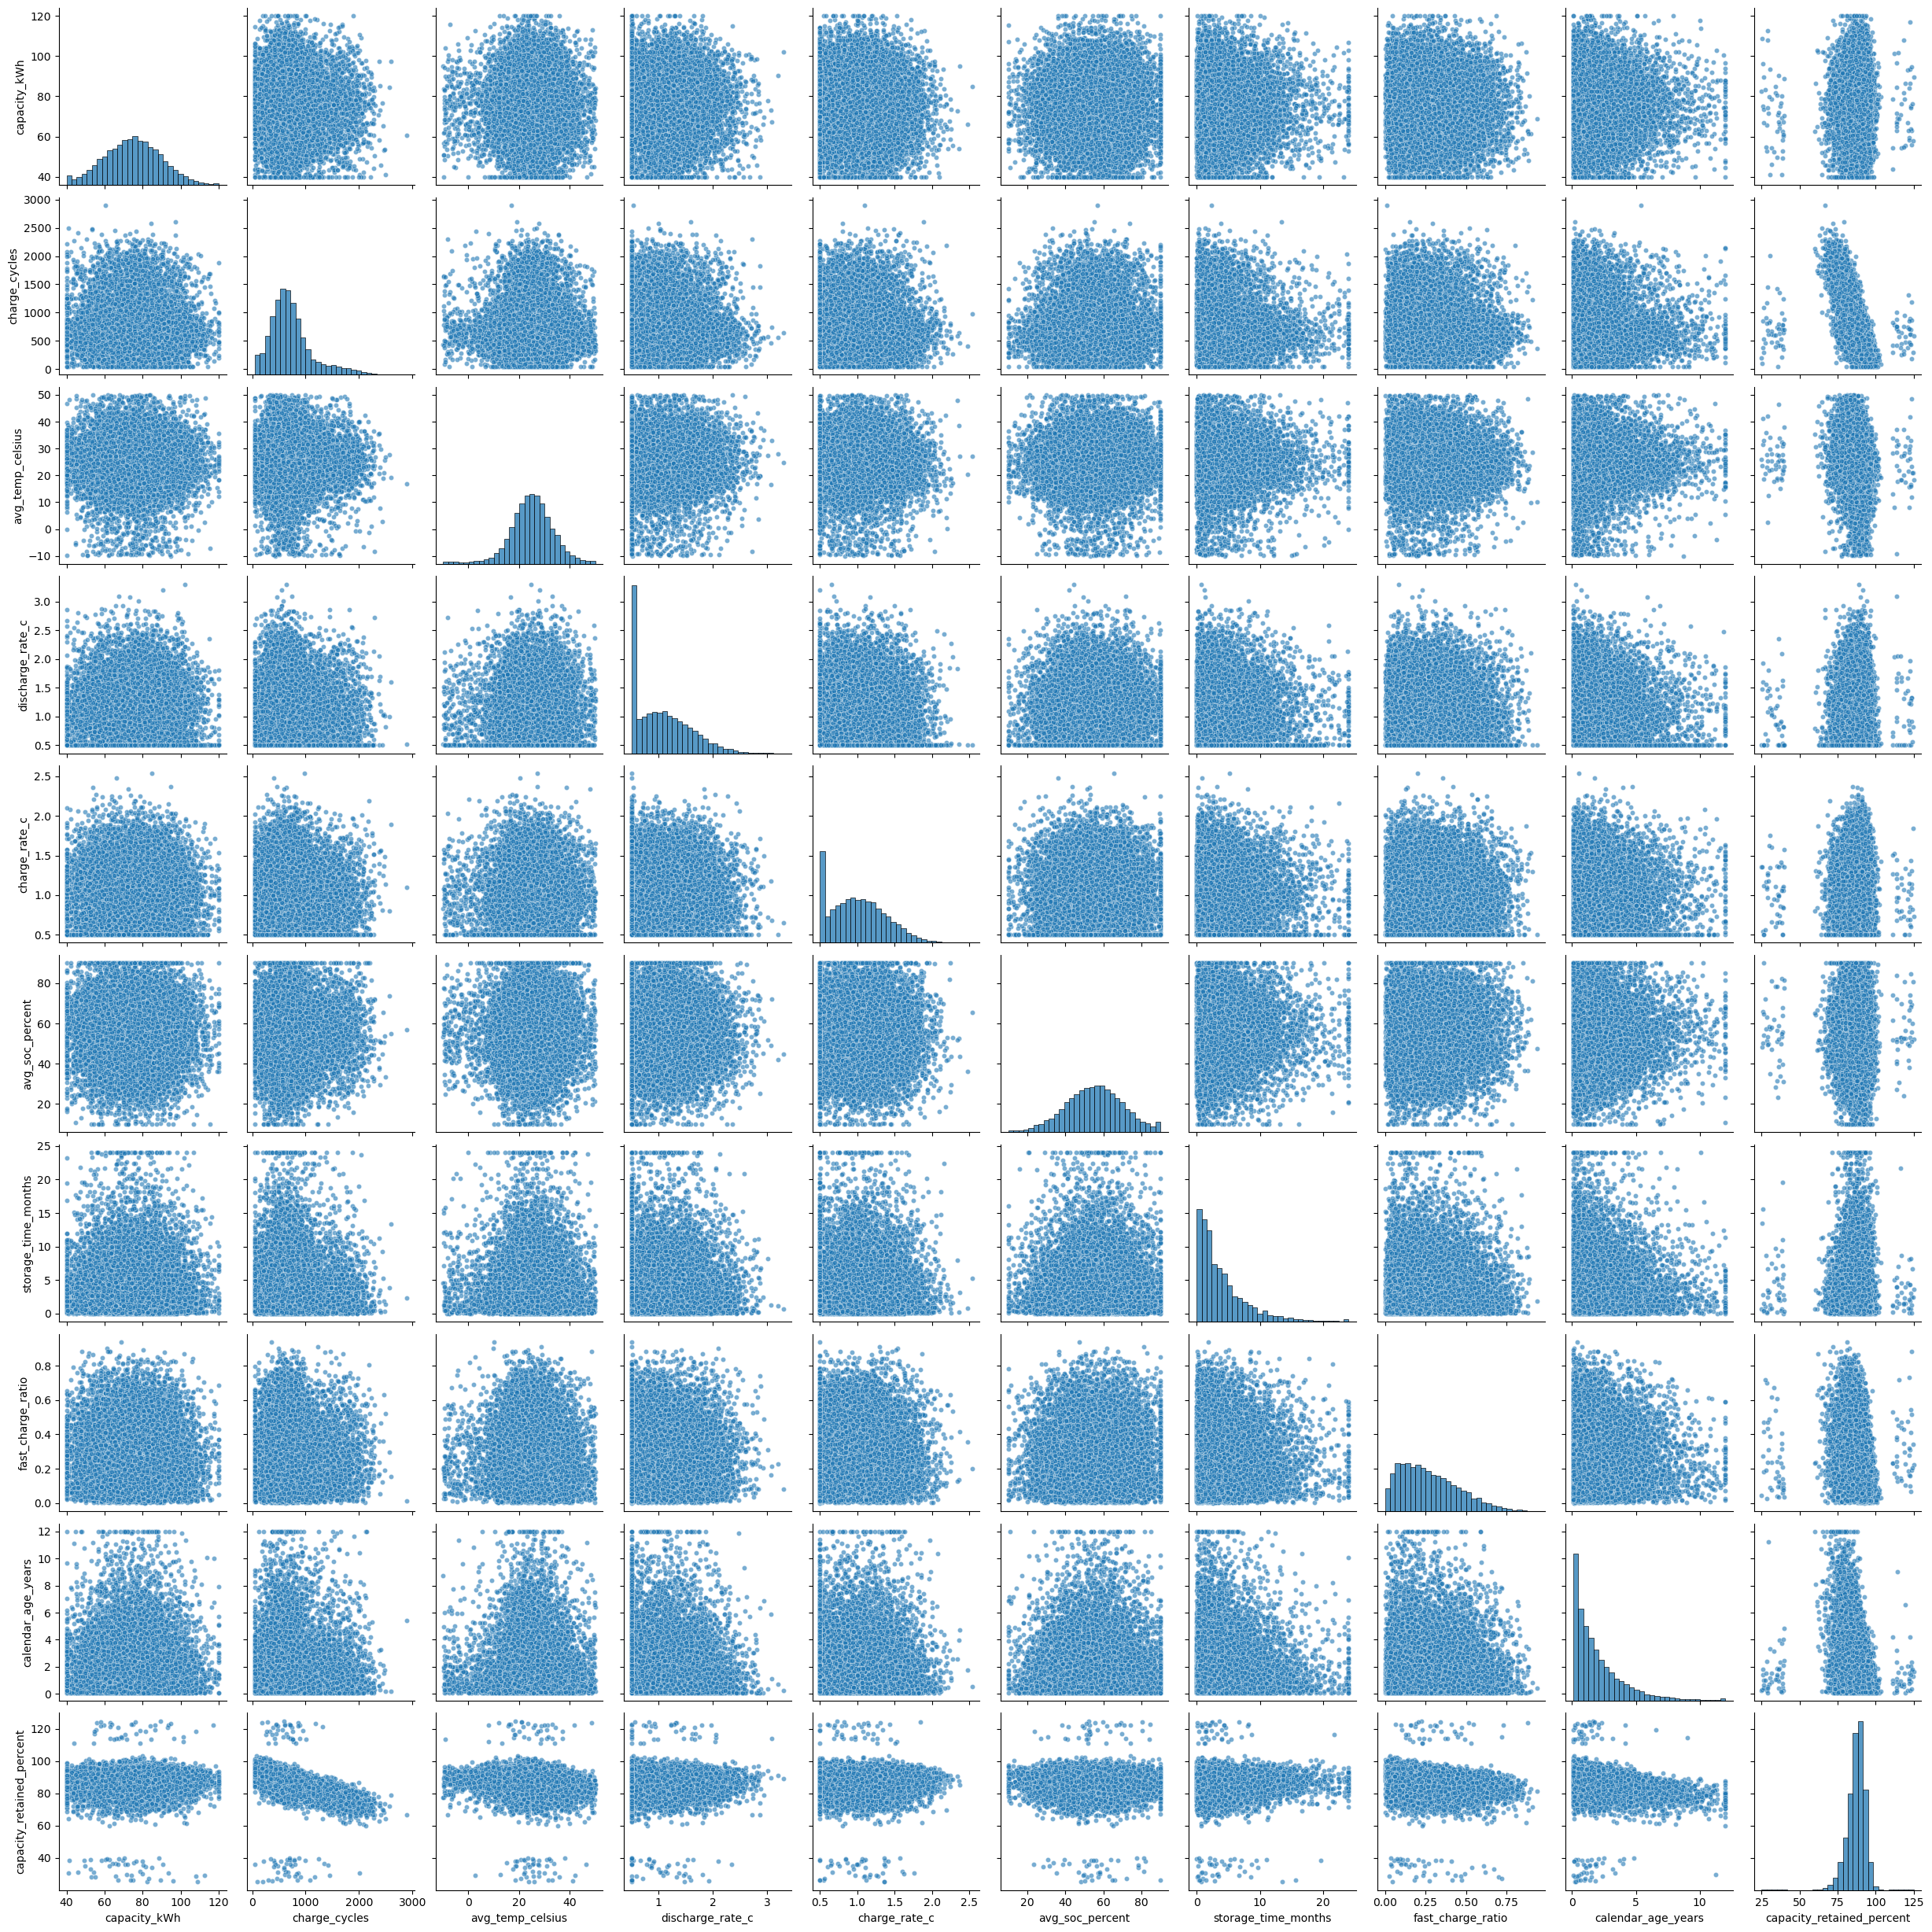

In [ ]:
sns.pairplot(df, 
             diag_kind='hist',  # or 'kde'
             plot_kws={'alpha': 0.6, 's': 20},  # scatter plot settings
             diag_kws={'bins': 30, 'edgecolor': 'black'})  # histogram settings
plt.show()

In [ ]:
min(df['avg_temp_celsius'])

-9.94

['capacity_kWh', 'charge_cycles', 'avg_temp_celsius', 'discharge_rate_c', 'charge_rate_c', 'avg_soc_percent', 'storage_time_months', 'fast_charge_ratio', 'calendar_age_years', 'capacity_retained_percent']
Index(['capacity_kWh', 'charge_cycles', 'avg_temp_celsius', 'discharge_rate_c',
       'charge_rate_c', 'avg_soc_percent', 'storage_time_months',
       'fast_charge_ratio', 'calendar_age_years', 'capacity_retained_percent'],
      dtype='object')


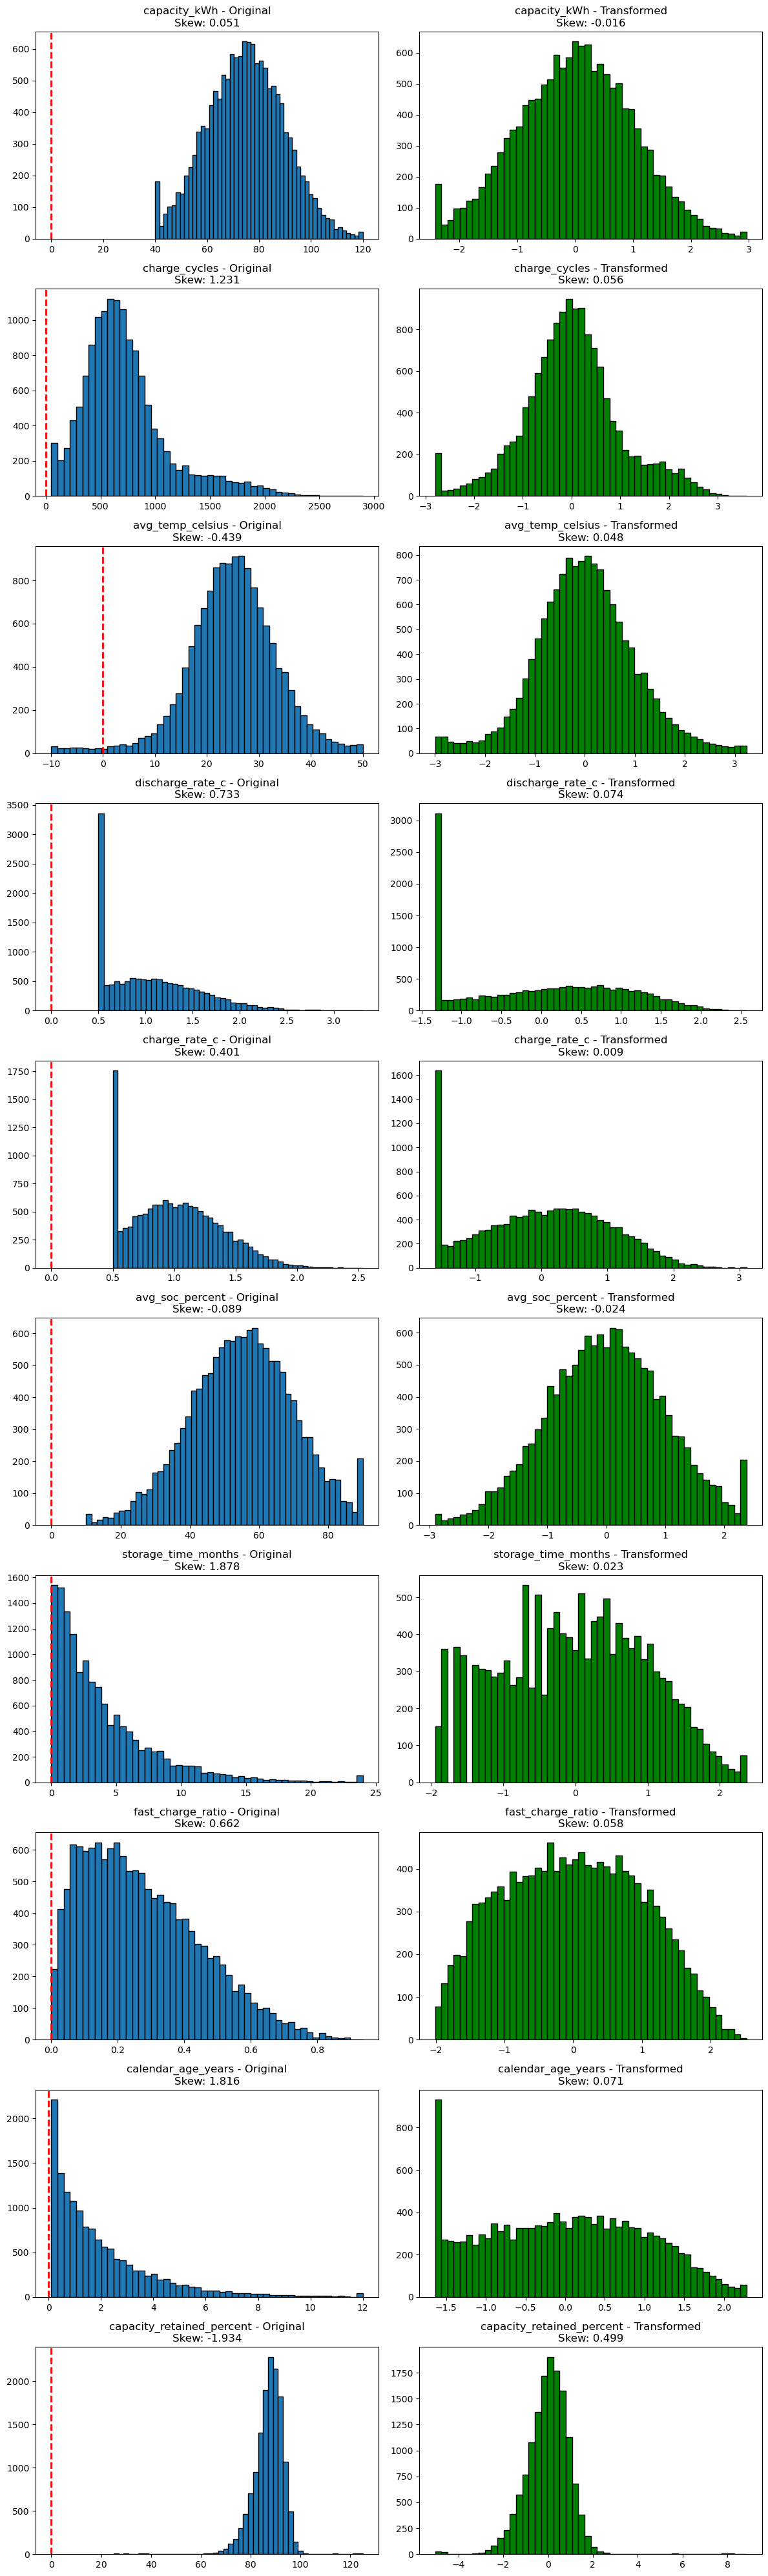

✓ Transformation complete! New columns created.


In [ ]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

def easy_yeo_johnson(df, columns):
    """
    EASIEST METHOD - Just one line of code!
    Works with ANY data (negative, zero, positive, any skewness)
    """
    # Initialize transformer
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    
    # Transform (ONE LINE!)
    df_transformed = df.copy()
    df_transformed[columns] = transformer.fit_transform(df[columns])
    
    # Visualize results
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4*len(columns)))
    if len(columns) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(columns):
        # Original
        axes[idx, 0].hist(df[col].dropna(), bins=50, edgecolor='black')
        axes[idx, 0].axvline(0, color='red', linestyle='--', linewidth=2)
        axes[idx, 0].set_title(f'{col} - Original\nSkew: {skew(df[col].dropna()):.3f}')
        
        # Transformed
        axes[idx, 1].hist(df_transformed[col].dropna(), bins=50, 
                         edgecolor='black', color='green')
        axes[idx, 1].set_title(f'{col} - Transformed\nSkew: {skew(df_transformed[col].dropna()):.3f}')
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Transformation complete! New columns created.")
    return df_transformed, transformer

# USAGE - Super simple!
n_cols = df.select_dtypes(include=[np.number]).columns
columns_to_transform = ['capacity_kWh', 'charge_cycles', 'avg_temp_celsius', 'discharge_rate_c',
       'charge_rate_c', 'avg_soc_percent', 'storage_time_months',
       'fast_charge_ratio', 'calendar_age_years', 'capacity_retained_percent']
print (columns_to_transform)
print(n_cols)
df_normalized, transformer = easy_yeo_johnson(df, columns_to_transform)

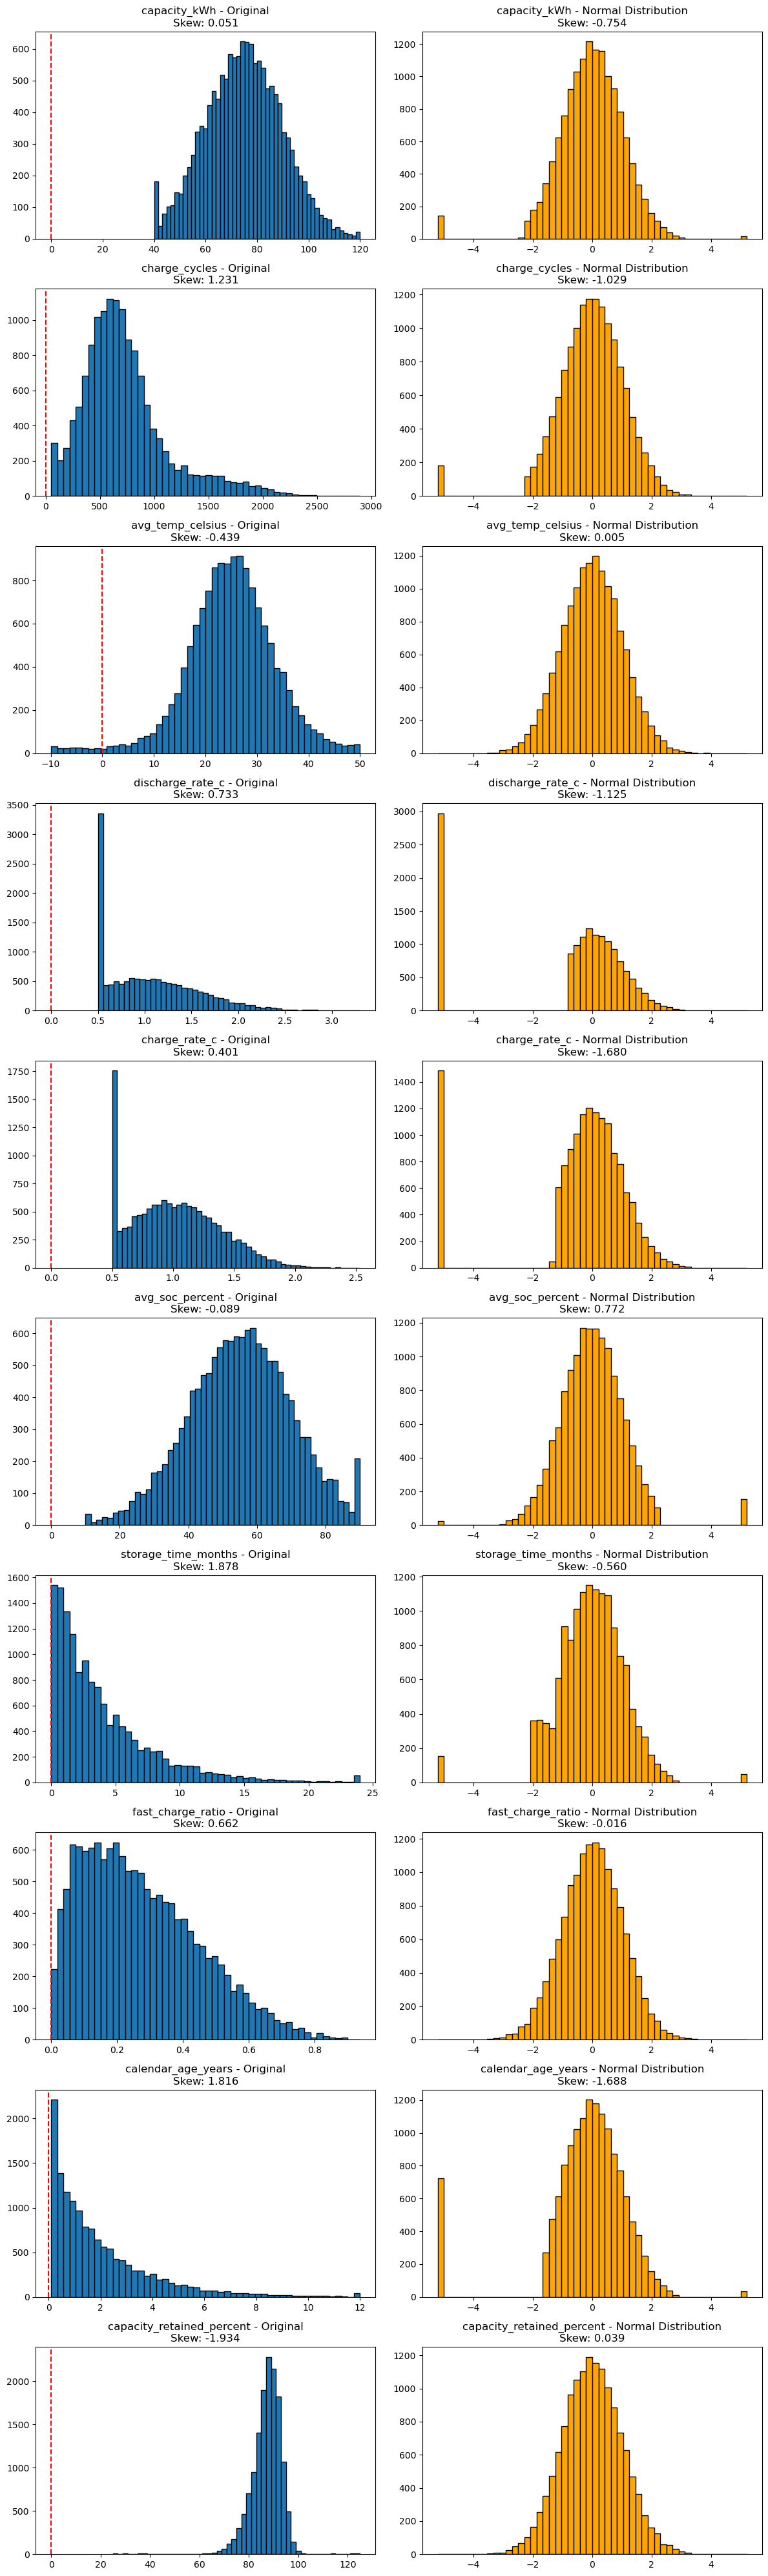

✓ Data transformed to normal distribution!


In [ ]:
from sklearn.preprocessing import QuantileTransformer

def easy_quantile(df, columns):
    """
    GUARANTEED to produce normal distribution
    Works with ANY data, ANY skewness
    """
    # Initialize
    transformer = QuantileTransformer(output_distribution='normal', 
                                     n_quantiles=1000, 
                                     random_state=42)
    
    # Transform
    df_transformed = df.copy()
    df_transformed[columns] = transformer.fit_transform(df[columns])
    
    # Visualize
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4*len(columns)))
    if len(columns) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(columns):
        # Original
        axes[idx, 0].hist(df[col].dropna(), bins=50, edgecolor='black')
        axes[idx, 0].axvline(0, color='red', linestyle='--')
        axes[idx, 0].set_title(f'{col} - Original\nSkew: {skew(df[col].dropna()):.3f}')
        
        # Transformed (will be perfectly normal!)
        axes[idx, 1].hist(df_transformed[col].dropna(), bins=50, 
                         edgecolor='black', color='orange')
        axes[idx, 1].set_title(f'{col} - Normal Distribution\nSkew: {skew(df_transformed[col].dropna()):.3f}')
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Data transformed to normal distribution!")
    return df_transformed, transformer

# USAGE
df_normalized, transformer = easy_quantile(df, columns_to_transform)

In [ ]:
df_clean =df.dropna()
len(df_clean)

8247

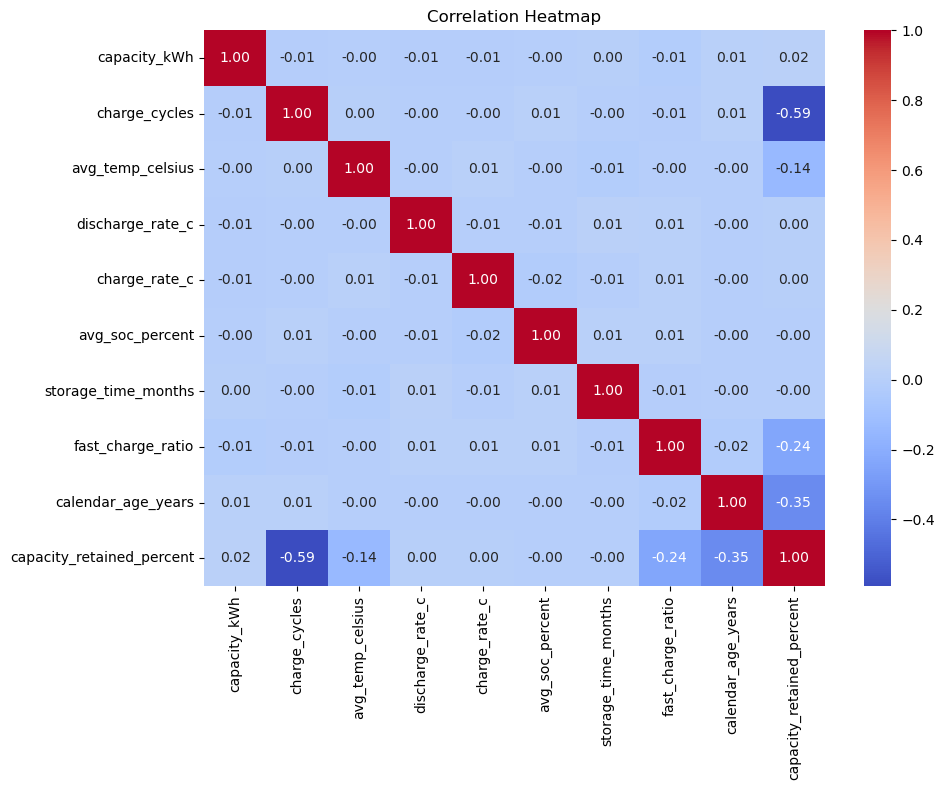

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
corr_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
#no multicollinearity found

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

print("Original dataset shape:", numeric_df.shape)
print("\n" + "="*60)

# ============================================================
# METHOD 1: IQR Method (Per Feature) - Conservative
# ============================================================
print("\n1. IQR METHOD (Per Feature)")
print("-" * 60)

def remove_outliers_iqr(df, multiplier=1.5):
    """
    multiplier=1.5 (standard) - removes extreme outliers
    multiplier=3.0 (lenient) - keeps more data
    """
    df_clean = df.copy()
    outlier_counts = {}
    
    for col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
        
        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    print(f"Outliers removed per feature:")
    for col, count in outlier_counts.items():
        print(f"  {col}: {count}")
    print(f"\nRows remaining: {len(df_clean)} ({len(df_clean)/len(df)*100:.1f}%)")
    
    return df_clean

df_iqr = remove_outliers_iqr(numeric_df, multiplier=1.5)

# ============================================================
# METHOD 2: Isolation Forest (Multivariate) - Recommended
# ============================================================
print("\n" + "="*60)
print("\n2. ISOLATION FOREST (Multivariate - Best for Multiple Features)")
print("-" * 60)

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

# Isolation Forest
iso_forest = IsolationForest(
    contamination=0.05,  # Expected % of outliers (adjust: 0.01 to 0.1)
    random_state=42,
    n_estimators=100
)

outlier_labels = iso_forest.fit_predict(df_scaled)
df_iso = numeric_df[outlier_labels == 1]  # 1 = inlier, -1 = outlier

outlier_count = (outlier_labels == -1).sum()
print(f"Outliers detected: {outlier_count} ({outlier_count/len(numeric_df)*100:.1f}%)")
print(f"Rows remaining: {len(df_iso)} ({len(df_iso)/len(numeric_df)*100:.1f}%)")

# ============================================================
# METHOD 3: Percentile Capping (Keeps more data)
# ============================================================
print("\n" + "="*60)
print("\n3. PERCENTILE CAPPING (Winsorization - Keeps all rows)")
print("-" * 60)

def cap_outliers(df, lower_percentile=1, upper_percentile=99):
    """
    Instead of removing, cap extreme values
    lower_percentile=1, upper_percentile=99 (keeps 98% range)
    """
    df_capped = df.copy()
    
    for col in df_capped.columns:
        lower_cap = df_capped[col].quantile(lower_percentile/100)
        upper_cap = df_capped[col].quantile(upper_percentile/100)
        
        df_capped[col] = df_capped[col].clip(lower_cap, upper_cap)
        
        capped_count = ((df[col] < lower_cap) | (df[col] > upper_cap)).sum()
        print(f"  {col}: {capped_count} values capped")
    
    print(f"\nAll rows retained: {len(df_capped)}")
    return df_capped

df_capped = cap_outliers(numeric_df, lower_percentile=1, upper_percentile=99)

# ============================================================
# RECOMMENDATION
# ============================================================
print("\n" + "="*60)
print("\nRECOMMENDATION:")
print("-" * 60)
print("Based on your data with 'lots of records in outlier region':")
print("\n1. BEST: Isolation Forest with contamination=0.05-0.10")
print("   → Considers all features together")
print("   → Good for battery data with natural variations")
print("\n2. ALTERNATIVE: Percentile Capping")
print("   → Keeps all data, just caps extremes")
print("   → Good when outliers are real measurements, not errors")
print("\n3. AVOID: IQR on each feature separately")
print("   → Too aggressive, removes too much data")
print("="*60)

# To use the cleaned data, assign it back:
# df_cleaned = df_iso  # or df_capped

Original dataset shape: (15000, 10)


1. IQR METHOD (Per Feature)
------------------------------------------------------------
Outliers removed per feature:
  capacity_kWh: 40
  charge_cycles: 864
  avg_temp_celsius: 407
  discharge_rate_c: 45
  charge_rate_c: 30
  avg_soc_percent: 41
  storage_time_months: 484
  fast_charge_ratio: 41
  calendar_age_years: 372
  capacity_retained_percent: 113

Rows remaining: 7181 (47.9%)


2. ISOLATION FOREST (Multivariate - Best for Multiple Features)
------------------------------------------------------------


ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.fillna(numeric_df.median())

print("Original dataset shape:", numeric_df.shape)

# Handle missing values first
print("\nMissing values per column:")
print(numeric_df.isnull().sum())
print("\n" + "="*60)

# Option 1: Drop rows with missing values
numeric_df_clean = numeric_df.dropna()
print(f"\nAfter removing NaN: {len(numeric_df_clean)} rows ({len(numeric_df_clean)/len(numeric_df)*100:.1f}%)")

# Option 2: Fill missing values with median (uncomment to use)
# numeric_df_clean = numeric_df.fillna(numeric_df.median())

print("\n" + "="*60)

# ============================================================
# METHOD 1: IQR Method (Per Feature) - Conservative
# ============================================================
print("\n1. IQR METHOD (Per Feature)")
print("-" * 60)

def remove_outliers_iqr(df, multiplier=1.5):
    """
    multiplier=1.5 (standard) - removes extreme outliers
    multiplier=3.0 (lenient) - keeps more data
    """
    df_clean = df.copy()
    outlier_counts = {}
    
    for col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
        
        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    print(f"Outliers removed per feature:")
    for col, count in outlier_counts.items():
        print(f"  {col}: {count}")
    print(f"\nRows remaining: {len(df_clean)} ({len(df_clean)/len(df)*100:.1f}%)")
    
    return df_clean

df_iqr = remove_outliers_iqr(numeric_df, multiplier=1.5)

# ============================================================
# METHOD 2: Isolation Forest (Multivariate) - Recommended
# ============================================================
print("\n" + "="*60)
print("\n2. ISOLATION FOREST (Multivariate - Best for Multiple Features)")
print("-" * 60)

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

# Isolation Forest
iso_forest = IsolationForest(
    contamination=0.05,  # Expected % of outliers (adjust: 0.01 to 0.1)
    random_state=42,
    n_estimators=100
)

outlier_labels = iso_forest.fit_predict(df_scaled)
df_iso = numeric_df[outlier_labels == 1]  # 1 = inlier, -1 = outlier

outlier_count = (outlier_labels == -1).sum()
print(f"Outliers detected: {outlier_count} ({outlier_count/len(numeric_df)*100:.1f}%)")
print(f"Rows remaining: {len(df_iso)} ({len(df_iso)/len(numeric_df)*100:.1f}%)")

# ============================================================
# METHOD 3: Percentile Capping (Keeps more data)
# ============================================================
print("\n" + "="*60)
print("\n3. PERCENTILE CAPPING (Winsorization - Keeps all rows)")
print("-" * 60)

def cap_outliers(df, lower_percentile=1, upper_percentile=99):
    """
    Instead of removing, cap extreme values
    lower_percentile=1, upper_percentile=99 (keeps 98% range)
    """
    df_capped = df.copy()
    
    for col in df_capped.columns:
        lower_cap = df_capped[col].quantile(lower_percentile/100)
        upper_cap = df_capped[col].quantile(upper_percentile/100)
        
        df_capped[col] = df_capped[col].clip(lower_cap, upper_cap)
        
        capped_count = ((df[col] < lower_cap) | (df[col] > upper_cap)).sum()
        print(f"  {col}: {capped_count} values capped")
    
    print(f"\nAll rows retained: {len(df_capped)}")
    return df_capped

df_capped = cap_outliers(numeric_df, lower_percentile=1, upper_percentile=99)

# ============================================================
# RECOMMENDATION
# ============================================================
print("\n" + "="*60)
print("\nRECOMMENDATION:")
print("-" * 60)
print("Based on your data with 'lots of records in outlier region':")
print("\n1. BEST: Isolation Forest with contamination=0.05-0.10")
print("   → Considers all features together")
print("   → Good for battery data with natural variations")
print("\n2. ALTERNATIVE: Percentile Capping")
print("   → Keeps all data, just caps extremes")
print("   → Good when outliers are real measurements, not errors")
print("\n3. AVOID: IQR on each feature separately")
print("   → Too aggressive, removes too much data")
print("="*60)

# To use the cleaned data, assign it back:
# df_cleaned = df_iso  # or df_capped

Original dataset shape: (15000, 10)

Missing values per column:
capacity_kWh                 0
charge_cycles                0
avg_temp_celsius             0
discharge_rate_c             0
charge_rate_c                0
avg_soc_percent              0
storage_time_months          0
fast_charge_ratio            0
calendar_age_years           0
capacity_retained_percent    0
dtype: int64


After removing NaN: 15000 rows (100.0%)


1. IQR METHOD (Per Feature)
------------------------------------------------------------
Outliers removed per feature:
  capacity_kWh: 67
  charge_cycles: 993
  avg_temp_celsius: 534
  discharge_rate_c: 72
  charge_rate_c: 64
  avg_soc_percent: 89
  storage_time_months: 735
  fast_charge_ratio: 105
  calendar_age_years: 640
  capacity_retained_percent: 239

Rows remaining: 11462 (76.4%)


2. ISOLATION FOREST (Multivariate - Best for Multiple Features)
------------------------------------------------------------
Outliers detected: 750 (5.0%)
Rows remaining: 14250 

In [4]:
import pandas as pd
df = pd.read_csv(r'D:\MLOPSS\Project 1\ev_battery_synth.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   battery_id                 15000 non-null  object 
 1   manufacturer               14315 non-null  object 
 2   chemistry                  14256 non-null  object 
 3   capacity_kWh               14268 non-null  float64
 4   charge_cycles              14311 non-null  float64
 5   avg_temp_celsius           14282 non-null  float64
 6   discharge_rate_c           14280 non-null  float64
 7   charge_rate_c              14289 non-null  float64
 8   avg_soc_percent            14241 non-null  float64
 9   storage_time_months        14259 non-null  float64
 10  fast_charge_ratio          14254 non-null  float64
 11  calendar_age_years         14203 non-null  float64
 12  capacity_retained_percent  14249 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.5+ M

In [6]:
df.describe()

capacity_kWh  charge_cycles  avg_temp_celsius  discharge_rate_c  \
count  14268.000000   14311.000000      14282.000000      14280.000000   
mean      74.831688     724.540354         24.836594          1.060485   
std       14.809087     398.426835          8.644186          0.498338   
min       40.000000      50.000000         -9.940000          0.500000   
25%       64.507500     467.500000         19.940000          0.584000   
50%       74.900000     655.000000         25.030000          0.989000   
75%       85.030000     880.000000         30.070000          1.393000   
max      120.000000    2898.000000         50.000000          3.303000   

       charge_rate_c  avg_soc_percent  storage_time_months  fast_charge_ratio  \
count   14289.000000     14241.000000         14259.000000       14254.000000   
mean        1.017919        55.178979             3.962192           0.273791   
std         0.360305        14.923134             3.957581           0.175465   
min         0.500000        10.000000             0.000000           0.000000   
25%         0.731000        45.040000             1.100000           0.132000   
50%         0.997000        55.410000             2.700000           0.245000   
75%         1.267000        65.430000             5.500000           0.390000   
max         2.534000        90.000000            24.000000           0.938000   

       calendar_age_years  capacity_retained_percent  
count        14203.000000               14249.000000  
mean             1.997541                  87.059668  
std              1.977227                   6.587419  
min              0.100000                  25.010000  
25%              0.570000                  84.000000  
50%              1.380000                  87.840000  
75%              2.770000                  91.050000  
max             12.000000                 124.990000

In [7]:
df.isnull().sum()

battery_id                     0
manufacturer                 685
chemistry                    744
capacity_kWh                 732
charge_cycles                689
avg_temp_celsius             718
discharge_rate_c             720
charge_rate_c                711
avg_soc_percent              759
storage_time_months          741
fast_charge_ratio            746
calendar_age_years           797
capacity_retained_percent    751
dtype: int64

In [8]:
#Dropped Battery_ID column 
df=df.drop('battery_id', axis=1)

In [9]:
df.head()

manufacturer chemistry  capacity_kWh  charge_cycles  avg_temp_celsius  \
0    Panasonic       NMC         65.54         1524.0             26.61   
1  Samsung SDI       LFP           NaN         1072.0             16.82   
2          BYD       LFP         99.99          807.0              6.27   
3         CATL       NMC         85.96          681.0             28.65   
4        Tesla       NMC         69.85          476.0             41.57   

   discharge_rate_c  charge_rate_c  avg_soc_percent  storage_time_months  \
0             1.507          0.500            51.96                  0.1   
1             0.850          0.927            80.76                 11.0   
2             0.751          1.232            74.73                  3.5   
3             0.788          1.070            30.95                  0.2   
4             0.683          0.607            59.67                  3.6   

   fast_charge_ratio  calendar_age_years  capacity_retained_percent  
0              0.155                1.58                      81.75  
1              0.466                3.44                      81.93  
2              0.058                0.23                      89.75  
3              0.332                3.43                      84.41  
4              0.307                0.34                      87.04

In [10]:
# df_clean = df.dropna(subset=['manufacturer','chemistry'])
# df_clean.isnull().sum()
df['manufacturer'] = df['manufacturer'].fillna('Unknown')
df['chemistry'] = df['chemistry'].fillna('Unknown')
df_clean= df
df_clean.isnull().sum()


manufacturer                   0
chemistry                      0
capacity_kWh                 732
charge_cycles                689
avg_temp_celsius             718
discharge_rate_c             720
charge_rate_c                711
avg_soc_percent              759
storage_time_months          741
fast_charge_ratio            746
calendar_age_years           797
capacity_retained_percent    751
dtype: int64

In [11]:
len(df_clean)

15000

In [12]:
## Using lambda function and groupby to fill up the null values by grouping manufacturer and chemistry 
#transform iterates through each
numeric_cols = df_clean.select_dtypes(include=['number']).columns 
print(numeric_cols)

df_clean[numeric_cols] = df_clean.groupby(['manufacturer','chemistry'])[numeric_cols].transform(lambda x:x.fillna(x.median()))

Index(['capacity_kWh', 'charge_cycles', 'avg_temp_celsius', 'discharge_rate_c',
       'charge_rate_c', 'avg_soc_percent', 'storage_time_months',
       'fast_charge_ratio', 'calendar_age_years', 'capacity_retained_percent'],
      dtype='object')


In [13]:
df_clean.isnull().sum()

manufacturer                 0
chemistry                    0
capacity_kWh                 0
charge_cycles                0
avg_temp_celsius             0
discharge_rate_c             0
charge_rate_c                0
avg_soc_percent              0
storage_time_months          0
fast_charge_ratio            0
calendar_age_years           0
capacity_retained_percent    0
dtype: int64

In [14]:
df_clean = df.dropna()

In [15]:
len(df_clean)

15000

In [16]:
# Option A: Custom Domain-Based Binning (Recommended)
def create_discharge_buckets(rate):
    if pd.isna(rate):
        return 'Unknown'
    elif rate <= 0.3:
        return 'Ultra_Slow'
    elif rate == 0.5:  # The spike you observed
        return 'Standard'
    elif rate <= 0.7:
        return 'Moderate'
    elif rate <= 1.0:
        return 'Fast'
    else:
        return 'Ultra_Fast'

def create_charge_buckets(rate):
    if pd.isna(rate):
        return 'Unknown'
    elif rate <= 0.3:
        return 'Slow_Charge'
    elif rate <= 0.5:
        return 'Standard_Charge'
    elif rate <= 1.0:
        return 'Fast_Charge'
    else:
        return 'Rapid_Charge'

# Create categorical bins
df['discharge_rate_category'] = df['discharge_rate_c'].apply(create_discharge_buckets)
df['charge_rate_category'] = df['charge_rate_c'].apply(create_charge_buckets)

In [17]:
df_clean['manufacturer'].unique()
df = df_clean

In [18]:
#Filling up of null values completed 

In [19]:
#Now Encoding the categorical data 
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder 

label_encoders = {}
categorical_cols = ['manufacturer','chemistry','discharge_rate_category','charge_rate_category']
df = df.drop(['discharge_rate_c','charge_rate_c'])

for col in categorical_cols:
    le = LabelEncoder()
    df[col+'_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

df= df.drop(categorical_cols,axis=1)

KeyError: "['discharge_rate_c', 'charge_rate_c'] not found in axis"

In [277]:
df.head()

capacity_kWh  charge_cycles  avg_temp_celsius  discharge_rate_c  \
0        65.540         1524.0             26.61             1.507   
1        75.235         1072.0             16.82             0.850   
2        99.990          807.0              6.27             0.751   
3        85.960          681.0             28.65             0.788   
4        69.850          476.0             41.57             0.683   

   charge_rate_c  avg_soc_percent  storage_time_months  fast_charge_ratio  \
0          0.500            51.96                  0.1              0.155   
1          0.927            80.76                 11.0              0.466   
2          1.232            74.73                  3.5              0.058   
3          1.070            30.95                  0.2              0.332   
4          0.607            59.67                  3.6              0.307   

   calendar_age_years  capacity_retained_percent  manufacturer_encoded  \
0                1.58                      81.75                     3   
1                3.44                      81.93                     4   
2                0.23                      89.75                     0   
3                3.43                      84.41                     1   
4                0.34                      87.04                     5   

   chemistry_encoded  
0                  2  
1                  0  
2                  0  
3                  2  
4                  2

In [278]:
#Encoding Completed 

In [279]:
# Outlier removal using Isolation Forest
from sklearn.ensemble import IsolationForest
import pandas as pd

print("="*60)
print("OUTLIER REMOVAL USING ISOLATION FOREST")
print("="*60)

# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

print(f"\nOriginal Dataset: {len(df)} rows")
print(f"Numeric columns used: {len(numeric_cols)}")

# Step 2: Check for nulls
if df_numeric.isnull().any().any():
    print("\n⚠ Warning: Nulls detected in numeric columns!")
    print(df_numeric.isnull().sum()[df_numeric.isnull().sum() > 0])
    print("Filling nulls with median before outlier detection...")
    df_numeric = df_numeric.fillna(df_numeric.median())

# Step 3: Initialize Isolation Forest
iso_forest = IsolationForest(
    contamination=0.05,      # 5% expected outliers
    random_state=42,
    n_estimators=120
)

# Step 4: Fit and predict
print("\nDetecting outliers...")
outlier_labels = iso_forest.fit_predict(df_numeric)

# Step 5: Filter out outliers
df_clean = df[outlier_labels == 1].copy()  # ← IMPORTANT: .copy()

# Step 6: Results
outliers_removed = len(df) - len(df_clean)
print(f"\n{'='*60}")
print("RESULTS:")
print(f"{'='*60}")
print(f"Outliers detected: {outliers_removed} ({outliers_removed/len(df)*100:.2f}%)")
print(f"Clean dataset: {len(df_clean)} rows ({len(df_clean)/len(df)*100:.2f}%)")

# Step 7: CRITICAL - Update df to use cleaned version
df = df_clean.copy()  # ← THIS IS THE FIX!

print(f"\n✓ Outliers removed. Working with {len(df)} rows now.")
print("="*60)

OUTLIER REMOVAL USING ISOLATION FOREST

Original Dataset: 15000 rows
Numeric columns used: 12

Detecting outliers...

RESULTS:
Outliers detected: 750 (5.00%)
Clean dataset: 14250 rows (95.00%)

✓ Outliers removed. Working with 14250 rows now.


In [280]:
#outlier removal is done... calculated expectation value = 3000 removed 2250
df = df_clean

In [281]:
df.columns

Index(['capacity_kWh', 'charge_cycles', 'avg_temp_celsius', 'discharge_rate_c',
       'charge_rate_c', 'avg_soc_percent', 'storage_time_months',
       'fast_charge_ratio', 'calendar_age_years', 'capacity_retained_percent',
       'manufacturer_encoded', 'chemistry_encoded'],
      dtype='object')

In [282]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

print("="*60)
print("NORMALIZATION PIPELINE")
print("="*60)

# Step 1: Correctly separate target and encoded features
TARGET_COLUMN = 'capacity_retained_percent'
ENCODED_COLUMNS = ['manufacturer_encoded', 'chemistry_encoded']

# Extract target (y)
y = df[TARGET_COLUMN].copy()

# Extract features to normalize (exclude target and encoded)
columns_to_exclude = [TARGET_COLUMN] + ENCODED_COLUMNS
X = df.drop(columns_to_exclude, axis=1)

# Extract encoded features (to add back later)
X_encoded = df[ENCODED_COLUMNS].copy()

print(f"\n[1] Data Separation:")
print(f"    Features to normalize (X): {X.shape}")
print(f"    Encoded features: {X_encoded.shape}")
print(f"    Target (y): {y.shape}")

# Step 2: Select numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
print(f"\n[2] Numeric columns to normalize: {list(numeric_cols)}")

# Step 3: Check skewness before
print("\n[3] Skewness BEFORE normalization:")
print(X[numeric_cols].skew().sort_values(ascending=False))

# Step 4: Apply Yeo-Johnson transformation
print("\n[4] Applying Yeo-Johnson transformation...")
transformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_normalized = transformer.fit_transform(X[numeric_cols])

# Step 5: Convert back to DataFrame
X_normalized_df = pd.DataFrame(
    X_normalized,
    columns=numeric_cols,
    index=X.index
)

# Step 6: Add back encoded columns (NOT target!)
X_final = pd.concat([X_normalized_df, X_encoded], axis=1)

# Step 7: Check skewness after
print("\n[5] Skewness AFTER normalization:")
print(X_final[numeric_cols].skew().sort_values(ascending=False))

# Step 8: Verify shapes
print("\n" + "="*60)
print("NORMALIZATION COMPLETE!")
print("="*60)
print(f"X_final (features only): {X_final.shape}")
print(f"y (target only): {y.shape}")
print(f"Shapes match: {X_final.shape[0] == y.shape[0]} ✓")

print(f"\nColumns in X_final:")
print(list(X_final.columns))
print(f"\nTarget variable name: {TARGET_COLUMN}")

NORMALIZATION PIPELINE

[1] Data Separation:
    Features to normalize (X): (14250, 9)
    Encoded features: (14250, 2)
    Target (y): (14250,)

[2] Numeric columns to normalize: ['capacity_kWh', 'charge_cycles', 'avg_temp_celsius', 'discharge_rate_c', 'charge_rate_c', 'avg_soc_percent', 'storage_time_months', 'fast_charge_ratio', 'calendar_age_years']

[3] Skewness BEFORE normalization:
storage_time_months    1.803248
calendar_age_years     1.785389
charge_cycles          1.222931
discharge_rate_c       0.752425
fast_charge_ratio      0.685847
charge_rate_c          0.390792
capacity_kWh           0.049198
avg_soc_percent       -0.091096
avg_temp_celsius      -0.341629
dtype: float64

[4] Applying Yeo-Johnson transformation...

[5] Skewness AFTER normalization:
avg_temp_celsius       0.103114
charge_cycles          0.076155
discharge_rate_c       0.064915
calendar_age_years     0.058124
fast_charge_ratio      0.048724
storage_time_months    0.015516
charge_rate_c          0.004419
ca

In [283]:
X_final.head()

capacity_kWh  charge_cycles  avg_temp_celsius  discharge_rate_c  \
0     -0.649942       1.968450          0.171888          1.027273   
1      0.033215       1.058970         -1.044043         -0.268034   
2      1.740659       0.425216         -2.202016         -0.538191   
3      0.778889       0.084127          0.437706         -0.434066   
4     -0.345086      -0.553518          2.200531         -0.740290   

   charge_rate_c  avg_soc_percent  storage_time_months  fast_charge_ratio  \
0      -1.651346        -0.238796            -1.837525          -0.629588   
1      -0.157662         1.830189             1.641881           1.186859   
2       0.699908         1.389829             0.309935          -1.475699   
3       0.261831        -1.679217            -1.696272           0.532295   
4      -1.236457         0.306013             0.341182           0.391600   

   calendar_age_years  manufacturer_encoded  chemistry_encoded  
0            0.190570                     3                  2  
1            1.104507                     4                  0  
2           -1.405324                     0                  0  
3            1.101089                     1                  2  
4           -1.196894                     5                  2

In [284]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# X= X_final.drop('capacity_retained_percent',axis=1)
# Y = X_final['capacity_retained_percent']
# print(len(X),
# len(Y))

KeyError: "['capacity_retained_percent'] not found in axis"

In [286]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    
    'KNeighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3],
            'subsample': [0.8, 1.0]
        }
    },
    
    'CatBoost': {
        'model': CatBoostRegressor(random_state=42, verbose=0),
        'params': {
            'iterations': [100, 200, 300],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    
    'AdaBoost': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    }
}






Train set: (11400, 11)
Test set: (2850, 11)


In [287]:
results = []

for model_name, model_info in models.items():
    print(f"\n[Training] {model_name}...")
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=0
    )
    
    # Fit
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store results
    results.append({
        'Model': model_name,
        'Best_Params': grid_search.best_params_,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Best_Model': best_model
    })
    
    print(f"  ✓ Best R2 Score: {test_r2:.4f}")
    print(f"  ✓ Best Params: {grid_search.best_params_}")



[Training] Linear Regression...
  ✓ Best R2 Score: 0.5286
  ✓ Best Params: {'fit_intercept': True}

[Training] Decision Tree...
  ✓ Best R2 Score: 0.4722
  ✓ Best Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

[Training] Random Forest...
  ✓ Best R2 Score: 0.5785
  ✓ Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

[Training] KNeighbors...
  ✓ Best R2 Score: 0.4709
  ✓ Best Params: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

[Training] XGBoost...
  ✓ Best R2 Score: 0.5994
  ✓ Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

[Training] CatBoost...
  ✓ Best R2 Score: 0.6062
  ✓ Best Params: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

[Training] AdaBoost...
  ✓ Best R2 Score: 0.4188
  ✓ Best Params: {'learning_rate': 0.01, 'n_estimators': 50}


In [288]:
results_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'Best_Model'} 
                           for r in results])

# Sort by Test R2 Score (descending)
results_df = results_df.sort_values('Test_R2', ascending=False)

# Display results
print("\n" + results_df.to_string(index=False))

# ============================================================
# STEP 5: Best Model Summary
# ============================================================
print("\n" + "="*70)
print("BEST MODEL SUMMARY")
print("="*70)

best_result = results_df.iloc[0]
best_model_name = best_result['Model']
best_model_obj = [r['Best_Model'] for r in results if r['Model'] == best_model_name][0]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R² Score: {best_result['Test_R2']:.4f}")
print(f"   Test RMSE: {best_result['Test_RMSE']:.4f}")
print(f"   Test MAE: {best_result['Test_MAE']:.4f}")
print(f"\n   Best Parameters:")
for param, value in eval(best_result['Best_Params']).items():
    print(f"   - {param}: {value}")

# ============================================================
# STEP 6: Detailed Metrics Table
# ============================================================
print("\n" + "="*70)
print("DETAILED METRICS COMPARISON")
print("="*70)

metrics_df = results_df[['Model', 'Train_R2', 'Test_R2', 'Test_RMSE', 'Test_MAE']].copy()
metrics_df['Overfit'] = metrics_df['Train_R2'] - metrics_df['Test_R2']

print("\n" + metrics_df.to_string(index=False))

# ============================================================
# STEP 7: Save Best Model
# ============================================================
import pickle

# Save best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)

print("\n" + "="*70)
print(f"✓ Best model ({best_model_name}) saved as 'best_model.pkl'")
print("="*70)


            Model                                                                           Best_Params  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE
         CatBoost                                 {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}  0.536762 0.606248    3.992845   3.323385   2.102602  2.040397
          XGBoost         {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}  0.553830 0.599425    3.918598   3.352057   2.073237  2.077933
    Random Forest {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}  0.700895 0.578512    3.208428   3.438444   1.825607  2.155466
Linear Regression                                                               {'fit_intercept': True}  0.457329 0.528632    4.321643   3.636215   2.493214  2.371747
    Decision Tree                       {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}  0.427785 0.472234    4.437723   3.847603   2.690460  2.6064

TypeError: eval() arg 1 must be a string, bytes or code object

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.ensemble import IsolationForest, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print(" COMPLETE MACHINE LEARNING PIPELINE: EDA TO MODELING")
print("="*80)

# ============================================================================
# PART 1: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
print("\n" + "="*80)
print("PART 1: EXPLORATORY DATA ANALYSIS")
print("="*80)

# Load data (assuming df is already loaded)
# df = pd.read_csv('your_data.csv')

print(f"\n[1.1] Dataset Overview")
print(f"      Shape: {df.shape}")
print(f"\n      Data Types:")
print(df.dtypes)

print(f"\n[1.2] Missing Values")
missing = df.isnull().sum()
print(missing[missing > 0])

print(f"\n[1.3] Statistical Summary")
print(df.describe())

print(f"\n[1.4] Target Variable Distribution")
if 'capacity_retained_percent' in df.columns:
    print(f"      Mean: {df['capacity_retained_percent'].mean():.2f}")
    print(f"      Median: {df['capacity_retained_percent'].median():.2f}")
    print(f"      Std: {df['capacity_retained_percent'].std():.2f}")

# ============================================================================
# PART 2: DATA PREPROCESSING
# ============================================================================
print("\n" + "="*80)
print("PART 2: DATA PREPROCESSING")
print("="*80)

# ----------------------------------------------------------------------------
# STEP 2.1: Handle Missing Values
# ----------------------------------------------------------------------------
print("\n[2.1] Handling Missing Values")
print("-"*80)

# Fill categorical nulls
categorical_cols = ['manufacturer', 'chemistry']
for col in categorical_cols:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        df[col] = df[col].fillna('Unknown')
        print(f"      Filled {null_count} nulls in {col} with 'Unknown'")

# Fill numeric nulls with grouped median
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f"\n      Filling numeric nulls with grouped median...")

if 'manufacturer' in df.columns and 'chemistry' in df.columns:
    df[numeric_cols] = df.groupby(['manufacturer', 'chemistry'])[numeric_cols].transform(
        lambda x: x.fillna(x.median())
    )

# Fallback - overall median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print(f"      ✓ Total nulls remaining: {df.isnull().sum().sum()}")

# ----------------------------------------------------------------------------
# STEP 2.2: Encode Categorical Data
# ----------------------------------------------------------------------------
print("\n[2.2] Encoding Categorical Data")
print("-"*80)

label_encoders = {}
categorical_to_encode = ['manufacturer', 'chemistry']

for col in categorical_to_encode:
    if col in df.columns:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"      ✓ Encoded {col}: {df[col].nunique()} unique values")

# Drop original categorical columns
df = df.drop([col for col in categorical_to_encode if col in df.columns], axis=1)

# ----------------------------------------------------------------------------
# STEP 2.3: Create Bins for charge_rate_c and discharge_rate_c
# ----------------------------------------------------------------------------
print("\n[2.3] Creating Bins for Rate Columns")
print("-"*80)

# Custom binning functions
def create_discharge_buckets(rate):
    if pd.isna(rate):
        return 'Unknown'
    elif rate <= 0.3:
        return 'Ultra_Slow'
    elif rate == 0.5:
        return 'Standard'
    elif rate <= 0.7:
        return 'Moderate'
    elif rate <= 1.0:
        return 'Fast'
    else:
        return 'Ultra_Fast'

def create_charge_buckets(rate):
    if pd.isna(rate):
        return 'Unknown'
    elif rate <= 0.3:
        return 'Slow_Charge'
    elif rate <= 0.5:
        return 'Standard_Charge'
    elif rate <= 1.0:
        return 'Fast_Charge'
    else:
        return 'Rapid_Charge'

# Create bins
if 'discharge_rate_c' in df.columns:
    df['discharge_rate_category'] = df['discharge_rate_c'].apply(create_discharge_buckets)
    le_discharge = LabelEncoder()
    df['discharge_rate_binned'] = le_discharge.fit_transform(df['discharge_rate_category'])
    label_encoders['discharge_rate_category'] = le_discharge
    print(f"      ✓ Created discharge_rate_binned: {df['discharge_rate_binned'].nunique()} bins")
    df = df.drop(['discharge_rate_c', 'discharge_rate_category'], axis=1)

if 'charge_rate_c' in df.columns:
    df['charge_rate_category'] = df['charge_rate_c'].apply(create_charge_buckets)
    le_charge = LabelEncoder()
    df['charge_rate_binned'] = le_charge.fit_transform(df['charge_rate_category'])
    label_encoders['charge_rate_category'] = le_charge
    print(f"      ✓ Created charge_rate_binned: {df['charge_rate_binned'].nunique()} bins")
    df = df.drop(['charge_rate_c', 'charge_rate_category'], axis=1)

# ----------------------------------------------------------------------------
# STEP 2.4: Outlier Removal using Isolation Forest
# ----------------------------------------------------------------------------
print("\n[2.4] Outlier Removal using Isolation Forest")
print("-"*80)

numeric_cols = df.select_dtypes(include=['number']).columns
original_rows = len(df)

print(f"      Original rows: {original_rows}")

iso_forest = IsolationForest(
    contamination=0.05,
    random_state=42,
    n_estimators=100
)

outlier_labels = iso_forest.fit_predict(df[numeric_cols])
df = df[outlier_labels == 1].copy()

outliers_removed = original_rows - len(df)
print(f"      ✓ Outliers removed: {outliers_removed} ({outliers_removed/original_rows*100:.2f}%)")
print(f"      ✓ Rows remaining: {len(df)}")

# ----------------------------------------------------------------------------
# STEP 2.5: Normalization using Yeo-Johnson
# ----------------------------------------------------------------------------
print("\n[2.5] Normalization using Yeo-Johnson")
print("-"*80)

TARGET = 'capacity_retained_percent'
ENCODED_COLS = ['manufacturer_encoded', 'chemistry_encoded', 
                'discharge_rate_binned', 'charge_rate_binned']

# Separate target and features
y = df[TARGET].copy()
X = df.drop(TARGET, axis=1).copy()

# Identify columns to normalize (exclude encoded/binned)
all_numeric = X.select_dtypes(include=['number']).columns.tolist()
cols_to_normalize = [col for col in all_numeric if col not in ENCODED_COLS]

print(f"      Columns to normalize ({len(cols_to_normalize)}): {cols_to_normalize}")
print(f"      Columns to keep as-is ({len(ENCODED_COLS)}): {ENCODED_COLS}")

# Apply normalization
transformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_normalized_array = transformer.fit_transform(X[cols_to_normalize])

X_normalized = pd.DataFrame(
    X_normalized_array,
    columns=cols_to_normalize,
    index=X.index
)

# Combine normalized + encoded columns
X_final = pd.concat([X_normalized, X[ENCODED_COLS]], axis=1)

print(f"      ✓ Final features shape: {X_final.shape}")
print(f"      ✓ Target shape: {y.shape}")

# Save preprocessing objects
preprocessing_objects = {
    'label_encoders': label_encoders,
    'transformer': transformer,
    'cols_to_normalize': cols_to_normalize,
    'encoded_cols': ENCODED_COLS,
    'target_column': TARGET
}

with open('preprocessing_objects.pkl', 'wb') as f:
    pickle.dump(preprocessing_objects, f)

print(f"      ✓ Preprocessing objects saved")

# ============================================================================
# PART 3: TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "="*80)
print("PART 3: TRAIN-TEST SPLIT")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

print(f"\n      Train set: {X_train.shape}")
print(f"      Test set: {X_test.shape}")

# ============================================================================
# PART 4: MODEL TRAINING WITH GRIDSEARCHCV
# ============================================================================
print("\n" + "="*80)
print("PART 4: MODEL TRAINING WITH GRIDSEARCHCV")
print("="*80)

# Define models and hyperparameters
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    
    'KNeighbors': {
        'model': KNeighborsRegressor(n_jobs=-1),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3],
            'subsample': [0.8, 1.0]
        }
    },
    
    'CatBoost': {
        'model': CatBoostRegressor(random_state=42, verbose=0),
        'params': {
            'iterations': [100, 200],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    
    'AdaBoost': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    }
}

# Train models
results = []

for model_name, model_info in models.items():
    print(f"\n[4.{len(results)+1}] Training {model_name}...")
    print("-"*80)
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=0
    )
    
    # Fit
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store results
    results.append({
        'Model': model_name,
        'Best_Params': str(grid_search.best_params_),
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Overfit': train_r2 - test_r2,
        'Best_Model': best_model
    })
    
    print(f"      ✓ Best Test R²: {test_r2:.4f}")
    print(f"      ✓ Best RMSE: {test_rmse:.4f}")
    print(f"      ✓ Best Params: {grid_search.best_params_}")

# ============================================================================
# PART 5: MODEL COMPARISON & RESULTS
# ============================================================================
print("\n" + "="*80)
print("PART 5: MODEL COMPARISON & RESULTS")
print("="*80)

# Create results DataFrame
results_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'Best_Model'} 
                           for r in results])

# Sort by Test R2
results_df = results_df.sort_values('Test_R2', ascending=False).reset_index(drop=True)

# Display results
print("\n" + "-"*80)
print("MODEL PERFORMANCE COMPARISON (Sorted by Test R²)")
print("-"*80)
print(results_df[['Model', 'Train_R2', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'Overfit']].to_string(index=False))

# Best model
best_result = results_df.iloc[0]
best_model_name = best_result['Model']
best_model_obj = [r['Best_Model'] for r in results if r['Model'] == best_model_name][0]

print("\n" + "="*80)
print("BEST MODEL SUMMARY")
print("="*80)
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R² Score: {best_result['Test_R2']:.4f}")
print(f"   Test RMSE: {best_result['Test_RMSE']:.4f}")
print(f"   Test MAE: {best_result['Test_MAE']:.4f}")
print(f"   Overfitting: {best_result['Overfit']:.4f}")
print(f"\n   Best Hyperparameters:")
params = eval(best_result['Best_Params'])
for param, value in params.items():
    print(f"   - {param}: {value}")

# Save best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)

print(f"\n✓ Best model saved as 'best_model.pkl'")

# ============================================================================
# PART 6: PREDICTION PIPELINE EXAMPLE
# ============================================================================
print("\n" + "="*80)
print("PART 6: PREDICTION PIPELINE (For New Data)")
print("="*80)

print("""
# Load preprocessing objects and model
import pickle

with open('preprocessing_objects.pkl', 'rb') as f:
    prep = pickle.load(f)

with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Apply same preprocessing to new data
def preprocess_new_data(df_new):
    # 1. Fill nulls
    df_new['manufacturer'] = df_new['manufacturer'].fillna('Unknown')
    df_new['chemistry'] = df_new['chemistry'].fillna('Unknown')
    
    # 2. Encode categoricals
    for col, encoder in prep['label_encoders'].items():
        if col in ['manufacturer', 'chemistry']:
            df_new[col + '_encoded'] = encoder.transform(df_new[col])
    
    # 3. Create bins
    df_new['discharge_rate_category'] = df_new['discharge_rate_c'].apply(create_discharge_buckets)
    df_new['discharge_rate_binned'] = prep['label_encoders']['discharge_rate_category'].transform(
        df_new['discharge_rate_category']
    )
    
    # 4. Normalize
    X_new_normalized = prep['transformer'].transform(df_new[prep['cols_to_normalize']])
    
    # 5. Combine
    X_new_final = pd.concat([
        pd.DataFrame(X_new_normalized, columns=prep['cols_to_normalize']),
        df_new[prep['encoded_cols']]
    ], axis=1)
    
    return X_new_final

# Make predictions
# X_new = preprocess_new_data(df_new)
# predictions = model.predict(X_new)
""")

print("\n" + "="*80)
print("✓ PIPELINE COMPLETE!")
print("="*80)
print(f"\nTotal rows processed: {len(df)}")
print(f"Features: {X_final.shape[1]}")
print(f"Best Model: {best_model_name}")
print(f"Best Test R²: {best_result['Test_R2']:.4f}")
print("\nFiles saved:")
print("  - preprocessing_objects.pkl")
print("  - best_model.pkl")
print("="*80)

 COMPLETE MACHINE LEARNING PIPELINE: EDA TO MODELING

PART 1: EXPLORATORY DATA ANALYSIS

[1.1] Dataset Overview
      Shape: (15000, 12)

      Data Types:
manufacturer                  object
chemistry                     object
capacity_kWh                 float64
charge_cycles                float64
avg_temp_celsius             float64
discharge_rate_c             float64
charge_rate_c                float64
avg_soc_percent              float64
storage_time_months          float64
fast_charge_ratio            float64
calendar_age_years           float64
capacity_retained_percent    float64
dtype: object

[1.2] Missing Values
Series([], dtype: int64)

[1.3] Statistical Summary
       capacity_kWh  charge_cycles  avg_temp_celsius  discharge_rate_c  \
count  15000.000000   15000.000000      15000.000000      15000.000000   
mean      74.836712     721.332833         24.845830          1.057114   
std       14.444523     389.459827          8.435214          0.486510   
min       40.000